In [12]:
import cv2
import numpy as np
from PIL import Image

image_num="000007"
img_file = f"logs/segmentation_results/{image_num}_image.png"
#img = cv2.imread().astype(np.float32)
img = Image.open(img_file)
np_img = np.asarray(img)
np_img = np_img.reshape((1,*np_img.shape))

In [13]:
#img = Image.open("sim_13226.jpg")

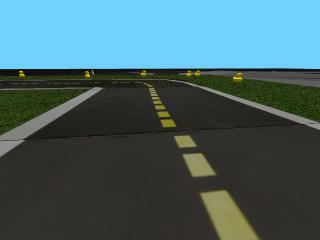

In [14]:
img

In [18]:
img2=img.resize((160,120), 3)

In [19]:
np_img = np.asarray(img2)
#np_img = np_img[:,:,::-1]
np_img = np_img.reshape((1,*np_img.shape))


In [21]:
import onnxruntime as ort
sess_ort = ort.InferenceSession("output/segmentation.onnx")
import time
start = time.time()
qty = 60
for i in range(0,qty):
    res = sess_ort.run(output_names=["output:0"], input_feed={"input_rgb:0": np_img.astype(np.float32)})
end = time.time()
delta=end-start
seg = res[0].astype(np.uint8).reshape(120,160)
print(f"Average frame rate: {1/(delta/qty)}")


Average frame rate: 40.69545964150035


seg.shape

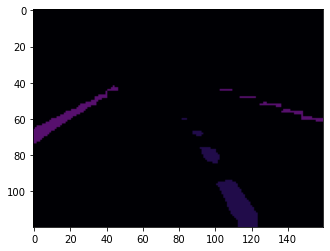

In [22]:
from cv2_plt_imshow import cv2_plt_imshow
#seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
#seg = cv2.transpose(seg.astype(np.uint8).reshape(160,120))
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*32, cv2.COLORMAP_INFERNO))

In [23]:
palette = np.zeros((256,3)).astype(int)

In [26]:
palette[0]=[0,0,0]
palette[1]=[255,255,255]
palette[2]=[255,255,0]
palette[3]=[255,0,0]
palette[4]=[0,0,255]
palette[5]=[0,255,0]
palette[2]=[255,255,255]
palette[1]=[255,255,0]

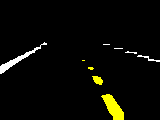

In [27]:
img = Image.fromarray(seg)
img.putpalette(palette.flatten().tolist())
img

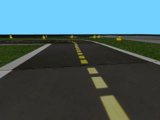

In [28]:
img2

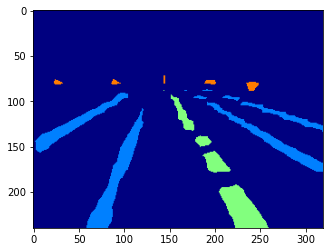

In [179]:
from cv2_plt_imshow import cv2_plt_imshow
seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
#eg = seg.astype(np.uint8).reshape(120,160)
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*64, cv2.COLORMAP_JET))